LENDING CLUB: the probability of one´s defaulting at paying their debt

In this exersice we will explore the data from the Lending Club to determine what variables influence one´s ability to repay  a loan. With that in mind we will build a model to predict the likelihood of a person´s defaulting. 

LAYOUT:
- EDA
- Preprocessing
- Modeling
- Evaluation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

In [2]:
%matplotlib inline

# Notebook configurations
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

warnings.filterwarnings('ignore')

**To obtain the data Download from [here](https://www.kaggle.com/shubhamsarafo/lending-club)**
- lending_club_info.csv(2.43 kB)
- lending_club_loan_two.csv(99.96 MB)

### There are many LendingClub data sets on Kaggle. Here is the information on this particular data set
	LoanStatNew 	Description
    0 	loan_amnt 	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
    1 	term 	The number of payments on the loan. Values are in months and can be either 36 or 60.
    2 	int_rate 	Interest Rate on the loan
    3 	installment 	The monthly payment owed by the borrower if the loan originates.
    4 	grade 	LC assigned loan grade
    5 	sub_grade 	LC assigned loan subgrade
    6 	emp_title 	The job title supplied by the Borrower when applying for the loan.*
    7 	emp_length 	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
    8 	home_ownership 	The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
    9 	annual_inc 	The self-reported annual income provided by the borrower during registration.
    10 	verification_status 	Indicates if income was verified by LC, not verified, or if the income source was verified
    11 	issue_d 	The month which the loan was funded
    12 	loan_status 	Current status of the loan
    13 	purpose 	A category provided by the borrower for the loan request.
    14 	title 	The loan title provided by the borrower
    15 	zip_code 	The first 3 numbers of the zip code provided by the borrower in the loan application.
    16 	addr_state 	The state provided by the borrower in the loan application
    17 	dti 	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
    18 	earliest_cr_line 	The month the borrower's earliest reported credit line was opened
    19 	open_acc 	The number of open credit lines in the borrower's credit file.
    20 	pub_rec 	Number of derogatory public records
    21 	revol_bal 	Total credit revolving balance
    22 	revol_util 	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
    23 	total_acc 	The total number of credit lines currently in the borrower's credit file
    24 	initial_list_status 	The initial listing status of the loan. Possible values are – W, F
    25 	application_type 	Indicates whether the loan is an individual application or a joint application with two co-borrowers
    26 	mort_acc 	Number of mortgage accounts.
    27 	pub_rec_bankruptcies 	Number of public record bankruptcies

In [3]:
data_info = pd.read_csv('../Data/lending_club_info.csv',index_col='LoanStatNew')

In [4]:
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [5]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [6]:
feat_info('pub_rec_bankruptcies')

Number of public record bankruptcies


In [7]:
lend_df = pd.read_csv('../Data/lending_club_loan_two.csv')

In [8]:
lend_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [9]:
lend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Section 1: Exploratory Data Analysis

#### OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data

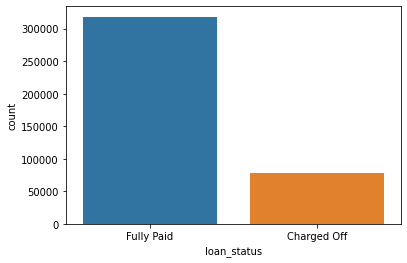

In [10]:
#Let´s explore the most important variable: is the loan paid?

sns.countplot(x='loan_status',data=lend_df)

plt.show()

#### Let´s do a histogram of the loan amount

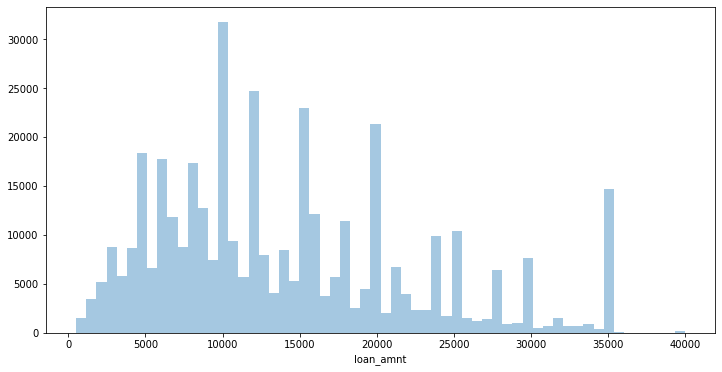

In [11]:

plt.figure(figsize=(12,6))
sns.distplot(
    lend_df['loan_amnt'],
    kde=False,
    bins=60
)

plt.show()

#### Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.

In [12]:
lend_df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


#### Let's visualize it  using a heatmap. 

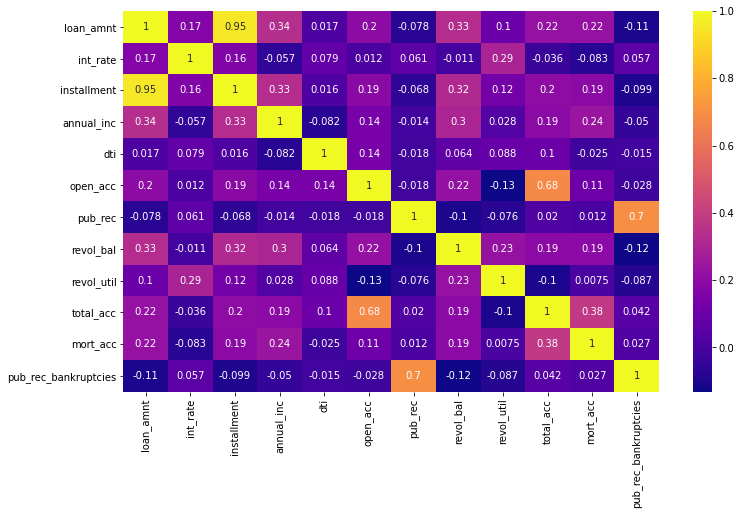

In [13]:

plt.figure(figsize=(12,7))
sns.heatmap(
    lend_df.corr(),
    annot=True,
    cmap='plasma'
)
plt.show()

#### There is almost perfect correlation with the "installment" feature, which may indicate duplicate information.

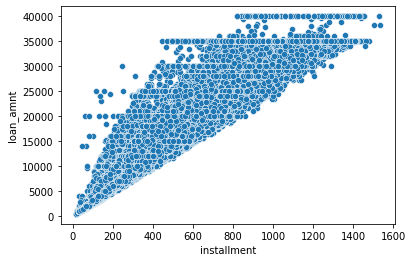

In [14]:

sns.scatterplot(
    x='installment',
    y='loan_amnt',
    data= lend_df
)
plt.show()

#### Boxplot showing the relationship between the loan_status and the Loan Amount. 

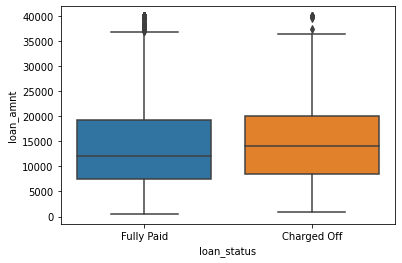

In [15]:

sns.boxplot(
    x='loan_status',
    y='loan_amnt',
    data=lend_df
)
plt.show()

#### Summary statistics for the loan amount, grouped by the loan_status.

In [16]:

lend_df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


#### Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?

In [17]:

lend_df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [18]:
lend_df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

#### Let´s visualize a  countplot per grade and if they have been paid or not.

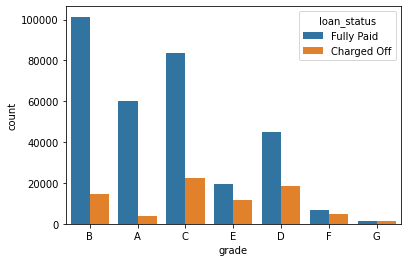

In [19]:
sns.countplot(
    x='grade',
    data=lend_df,
    hue='loan_status'
)

plt.show()

#### Looks like F and G grades have a higer number of defaulitng, we will display a count plot per subgrade.

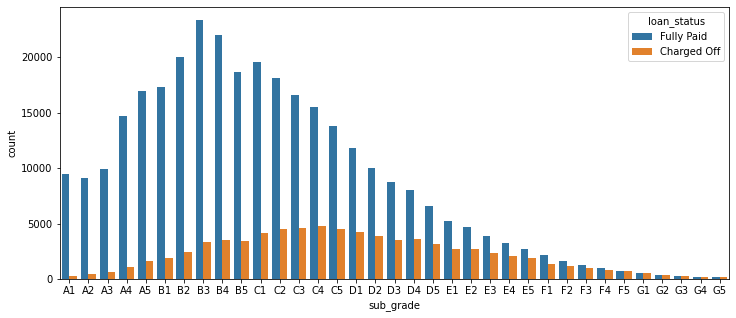

In [20]:

plt.figure(figsize=(12,5))

sns.countplot(
    x='sub_grade',
    data=lend_df,
    hue='loan_status',
    order=sorted(lend_df['sub_grade'].unique())
)

plt.show()

#### As we saw earlier it looks like F and G subgrades don't get paid back that often. We will Isloate those and recreate the countplot just for those subgrades.

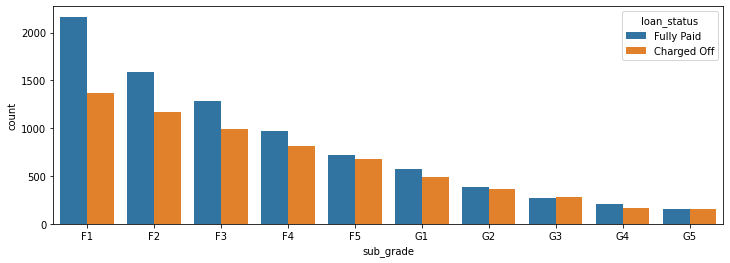

In [21]:

f_and_g = lend_df[(lend_df['grade']=='G') | (lend_df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(
    x='sub_grade',
    data=f_and_g,
    order = subgrade_order,
    hue='loan_status'
)

plt.show()

#### We will now prepare the data creating  a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

In [22]:

lend_df['loan_repaid'] = lend_df['loan_status'].apply(lambda x:1 if x=="Fully Paid" else 0 )

In [23]:
lend_df['loan_repaid']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_repaid, Length: 396030, dtype: int64

#### Bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)

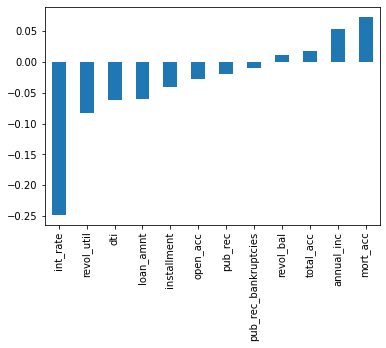

In [24]:

lend_df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

plt.show()

# Section 2: Data PreProcessing

#### Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.

In [25]:
lend_df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting**

In this stage, we will clean our data by 1) correcting aberrant values and outliers, 2) completing missing information, 3) creating new features for analysis, and 4) converting fields to the correct format for calculations and presentation.

- **Correcting:** Reviewing the data, there does not appear to be any aberrant or non-acceptable data inputs. In addition, we see we may have potential outliers in age and fare. However, since they are reasonable values, we will wait until after we complete our exploratory analysis to determine if we should include or exclude from the dataset. It should be noted, that if they were unreasonable values, for example age = 800 instead of 80, then it's probably a safe decision to fix now. However, we want to use caution when we modify data from its original value, because it may be necessary to create an accurate model.
- **Completing:** There are null values or missing data in the age, cabin, and embarked field. Missing values can be bad, because some algorithms don't know how-to handle null values and will fail. While others, like decision trees, can handle null values. Thus, it's important to fix before we start modeling, because we will compare and contrast several models. There are two common methods, either delete the record or populate the missing value using a reasonable input. It is not recommended to delete the record, especially a large percentage of records, unless it truly represents an incomplete record. Instead, it's best to impute missing values. A basic methodology for qualitative data is impute using mode. A basic methodology for quantitative data is impute using mean, median, or mean + randomized standard deviation. An intermediate methodology is to use the basic methodology based on specific criteria; like the average age by class or embark port by fare and SES. There are more complex methodologies, however before deploying, it should be compared to the base model to determine if complexity truly adds value. For this dataset, age will be imputed with the median, the cabin attribute will be dropped, and embark will be imputed with mode. Subsequent model iterations may modify this decision to determine if it improves the model’s accuracy.
- **Creating:** Feature engineering is when we use existing features to create new features to determine if they provide new signals to predict our outcome. For this dataset, we will create a title feature to determine if it played a role in survival.
- **Converting:** Last, but certainly not least, we'll deal with formatting. There are no date or currency formats, but datatype formats. Our categorical data imported as objects, which makes it difficult for mathematical calculations. For this dataset, we will convert object datatypes to categorical dummy variables.

## Missing Data

Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.


In [26]:

lend_df.shape

(396030, 28)

In [27]:

lend_df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [28]:
# CODE HERE
(lend_df.isnull().sum()/len(lend_df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

#### Let's examine emp_title and emp_length to see whether it will be okay to drop them. Printing out their feature information using the feat_info() function

In [29]:

feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [30]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


#### Let's see how many unique employment job titles are there?

In [31]:

lend_df['emp_title'].nunique()

173105

In [32]:
lend_df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

#### Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [33]:
# CODE HERE
lend_df = lend_df.drop('emp_title',axis=1)

#### Let's look at emp_length feature column. 

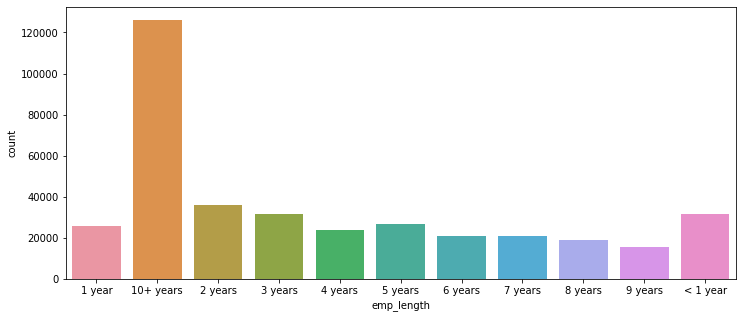

In [34]:

plt.figure(figsize=(12,5))
sns.countplot(
    x='emp_length',
    data=lend_df,
    order=sorted(lend_df['emp_length'].dropna().unique())
)

plt.show()

#### Countplot with a hue separating Fully Paid vs Charged Off

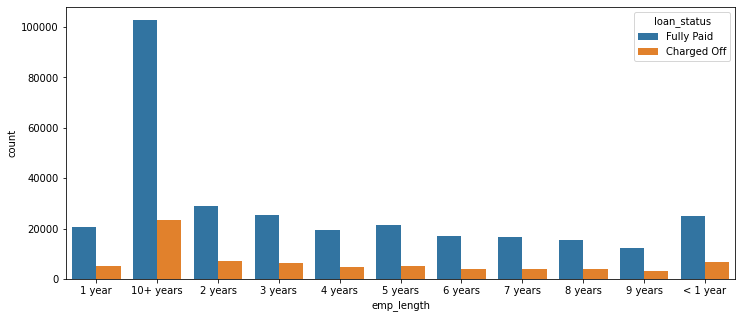

In [35]:

plt.figure(figsize=(12,5))
sns.countplot(
    x='emp_length',
    data=lend_df,
    hue='loan_status',
    order=sorted(lend_df['emp_length'].dropna().unique())
)

plt.show()

#### 
This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. 


In [1]:

ChargedOff = lend_df[lend_df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
FullyPaid = lend_df[lend_df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

emp_len = ChargedOff/ FullyPaid

emp_len.plot(kind='bar')

plt.show()

NameError: name 'lend_df' is not defined

#### Charge off rates are extremely similar across all employment lengths, we will go ahead and drop the emp_length column.

In [37]:

lend_df = lend_df.drop('emp_length', axis=1)

#### Let's review the title column vs the purpose column. Is this repeated information?

In [38]:

lend_df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [39]:
lend_df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

#### The title column is simply a string subcategory/description of the purpose column, we go ahead and drop the title column.

In [40]:

lend_df = lend_df.drop('title',axis=1)

#### Let's find out what the mort_acc feature represents 

In [41]:

feat_info('mort_acc')

Number of mortgage accounts.


#### Value_counts of the mort_acc column.

In [42]:

lend_df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

#### There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. 
    Let's review the other columsn to see which most highly correlates to mort_acc

In [43]:
lend_df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

####  Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:

In [44]:
lend_df.groupby('total_acc').mean().head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,loan_repaid
total_acc,,,,,,,,,,,,
2.0,6672.222222,15.801111,210.881667,64277.777778,2.279444,1.611111,0.000000,2860.166667,53.527778,0.000000,0.000000,0.777778
3.0,6042.966361,15.615566,198.728318,41270.753884,6.502813,2.611621,0.045872,3382.807339,49.991022,0.052023,0.015480,0.779817
4.0,7587.399031,15.069491,250.050194,42426.565969,8.411963,3.324717,0.041195,4874.231826,58.477400,0.066743,0.022951,0.785945
5.0,7845.734714,14.917564,256.190325,44394.098003,10.118328,3.921598,0.071499,5475.253452,56.890311,0.103289,0.041171,0.796844
6.0,8529.019843,14.651752,278.518228,48470.001156,11.222542,4.511119,0.104003,6546.374957,57.812483,0.151293,0.055077,0.784126


In [45]:
total_acc_mean = lend_df.groupby('total_acc').mean()['mort_acc']

#### 
    Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. 

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe)

In [46]:

lend_df['mort_acc'] = lend_df.apply(lambda x : total_acc_mean[x['total_acc']] if (np.isnan(x['mort_acc'])) else x['mort_acc'],axis=1)

In [47]:
lend_df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

#### For revol_util and the pub_rec_bankruptcies that have missing data points,  they account for less than 0.5% of the total data we will remove the rows that are missing values.
  

In [48]:

lend_df = lend_df.dropna()

In [49]:
lend_df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

#### Categorical Variables and Dummy Variables
    We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.

    
[Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [50]:
#Let´s list the columns with catergorical values
lend_df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

#### We will convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().

In [51]:

lend_df['term'] = lend_df['term'].apply(lambda term: int(term[:3]))

In [52]:
lend_df['term'].head()

0    36
1    36
2    36
3    36
4    60
Name: term, dtype: int64

#### We already know grade is part of sub_grade, so we just drop the grade feature.

In [53]:

lend_df = lend_df.drop('grade',axis =1)

#### Let´s convert the subgrade into dummy variables.


In [54]:

dummies = pd.get_dummies(lend_df['sub_grade'],drop_first=True)

dummies.head()

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
lend_df = pd.concat([lend_df.drop('sub_grade',axis=1),dummies],axis=1)

#### Let's also convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe.
   

In [56]:

dummies = pd.get_dummies(lend_df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
lend_df = lend_df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
lend_df = pd.concat([lend_df,dummies],axis=1)

#### Let's review the value_counts for the home_ownership column.

In [57]:
lend_df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

#### Let's convert these to dummy variables,

In [58]:

lend_df['home_ownership'] = lend_df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(lend_df['home_ownership'], drop_first=True)
lend_df = lend_df.drop('home_ownership',axis=1)
lend_df = pd.concat([lend_df, dummies],axis=1)

####  Let's feature engineer a zip code column from the address in the data set. Creating a column called 'zip_code' that extracts the zip code from the address column.

In [59]:

lend_df['zip_code'] = lend_df['address'].apply(lambda x:x.split(' ')[-1])

In [60]:
lend_df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

#### Let's make this zip_code column into dummy variables using pandas. Concatenating the result and dropping the original zip_code column along with dropping the address column.

In [61]:
dummies = pd.get_dummies(lend_df['zip_code'],drop_first=True)
lend_df = lend_df.drop(['zip_code','address'],axis=1)
lend_df = pd.concat([lend_df,dummies],axis=1)

#### For issue_date we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, we will drop this feature.

In [62]:

lend_df = lend_df.drop('issue_d',axis=1)

#### Earliest_cr_year appears to be a historical time stamp feature. We will extract the year from this feature using a .apply function, then convert it to a numeric feature. We will Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.

In [63]:

lend_df['earliest_cr_year'] = lend_df['earliest_cr_line'].apply(lambda x : x.split("-")[-1])

In [64]:
lend_df = lend_df.drop('earliest_cr_line',axis=1)

## Train test Split

#### Importing train_test_split from sklearn.

In [65]:

from sklearn.model_selection import train_test_split

#### We drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.

In [66]:

lend_df = lend_df.drop('loan_status',axis=1)

#### We Set X and y variables to the .values of the features and label.

In [67]:

X= lend_df.drop('loan_repaid',axis=1).values
y= lend_df['loan_repaid'].values

#### We Perform a train/test split with test_size=0.2 and a random_state of 101.

In [68]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Normalizing the Data
#### We will use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.

In [69]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

####  importing Keras functions.

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

#### Let's  Build a sequential model that will be trained on the data.
  
    
[Hard question to...HOW TO CHOOSE HIDDEN LAYERS NUMBER IN A FEED FORWARD NN?](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw)

In [71]:

model = Sequential()
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))

In [72]:
# We compile() - Use binary_crossentropy as loss function and adam optimizer
model.compile(
    loss='binary_crossentropy',
    optimizer='adam'
)

2022-01-17 11:45:18.074202: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-01-17 11:45:18.100818: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fa23e4b2e30 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-01-17 11:45:18.100834: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


#### Let's fit the model to the training data for at least 25 epochs. And adding in the validation data for later plotting. 

In [73]:

model.fit(
    x=X_train,
    y=y_train,
    epochs=25,
    batch_size=256,
    validation_data=(X_test, y_test),
)

Epoch 1/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.3033 - val_loss: 0.2649
Epoch 2/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2664 - val_loss: 0.2630
Epoch 3/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2635 - val_loss: 0.2623
Epoch 4/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2617 - val_loss: 0.2624
Epoch 5/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2610 - val_loss: 0.2624
Epoch 6/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2605 - val_loss: 0.2616
Epoch 7/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2602 - val_loss: 0.2619
Epoch 8/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2596 - val_loss: 0.2614
Epoch 9/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2593 - val_loss: 0.2617
Epoch 10/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.259

In [74]:

from tensorflow.keras.models import load_model
#model.save('keras.h5')  # this code saves the model in the current directory where the notebook is running

## Section 3: Evaluating Model Performance

#### Let's plot out the validation loss versus the training loss.

In [75]:

loss = pd.DataFrame(model.history.history)

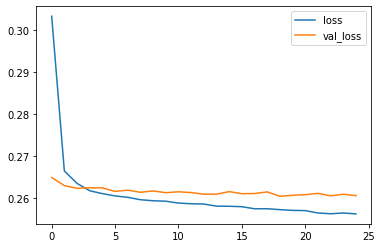

In [76]:
loss[['loss','val_loss']].plot()

plt.show()

#### Predictions from the X_test set and let´s display a classification report and confusion matrix for the X_test set.

In [77]:

predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [78]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [79]:
print(confusion_matrix(y_test,predictions))

[[ 6981  8677]
 [  201 63185]]
